In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
sys.path.append('..')
from cal_func import eV_to_nm, cal_spec_extention, full_spectrum, plot, plot_single_spec, plot_cal_uvvis, plot_exp_uvvis

## NH3 Test

In [33]:
NH3_S1_path = 'NH3_test/spec_Int_TI_hwhm0.030.dat'
NH3_Stick_path = 'NH3_test/Stick_Transitions.dat'

NH3_S1 = pd.read_csv(NH3_S1_path, sep = '\s+', header = None, index_col = 0)
NH3_Stick = pd.read_csv(NH3_Stick_path, sep = '\s+', header = None, index_col = 0)

NH3_S1.columns = ['intensity']
NH3_S1.index.name = 'energy (eV)'
NH3_Stick.columns = ['intensity']
NH3_Stick.index.name = 'energy (eV)'

NH3_S1_nm = eV_to_nm(NH3_S1)
NH3_Stick_nm = eV_to_nm(NH3_Stick)

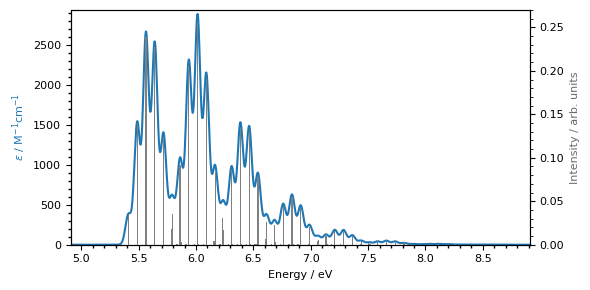

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, NH3_S1, NH3_Stick, 0.4, (0, 0.27))

ax.set(xlim = (min(NH3_S1.index), max(NH3_S1.index)), ylim = (0, max(NH3_S1['intensity'])+50))

fig.tight_layout()
fig.savefig('NH3_test.png', dpi = 150)
plt.show()

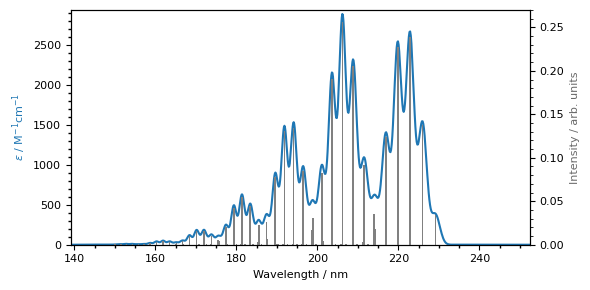

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, NH3_S1_nm, NH3_Stick_nm, 0.4, (0, 0.27))

ax.set(xlim = (min(NH3_S1_nm['wavelength']), max(NH3_S1_nm['wavelength'])), ylim = (0, max(NH3_S1_nm['intensity'])+50))

fig.tight_layout()
fig.savefig('NH3_test_nm.png', dpi = 150)
plt.show()

## Mn(II) Species

### Importing data

In [36]:
labels_ForRep = ['1.62 M in water', '1.63 M in HCl', '8.93$\cdot$10$^{-1}$ M in water', '8.76$\cdot$10$^{-1}$ M in HCl']
labels = [r'MnCl$^{+}$', r'MnCl$_{2}$', r'MnCl$_{3}^{-}$', r'MnCl(H$_{2}$O)$_{5}^{+}$', r'MnCl$_{2}$(H$_{2}$O)$_{4}$', r'Mn(H$_{2}$O)$_{6}$']
xkeys = ['X MnCl+', 'X MnCl2', 'X MnCl3-', 'X MnClH2O', 'X MnCl2aq', 'X MnH2O']
ykeys = ['Y MnCl+', 'Y MnCl2', 'Y MnCl3-', 'Y MnClH2O', 'Y MnCl2aq', 'Y MnH2O']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
ykes_exp = ['s1.3', 's2.3', 's3.3', 's4.3']

In [37]:
vacuum_uvvis_path = 'vacuum_uvvis.CSV'
vacuum_peak_path = 'vacuum_peak.CSV'
water_uvvis_path = 'water_uvvis.CSV'
water_peak_path = 'water_peak.CSV'
experimental_path = 'epsilon_fRep.csv'

vacuum_uvvis = pd.read_csv(vacuum_uvvis_path, sep = ';', decimal = ',')
vacuum_peak = pd.read_csv(vacuum_peak_path, sep = ';', decimal = ',')
water_uvvis = pd.read_csv(water_uvvis_path, sep = ';', decimal = ',')
water_peak = pd.read_csv(water_peak_path, sep = ';', decimal = ',')
experimental = pd.read_csv(experimental_path, index_col = 0)

In [38]:
dict_eV = {}
dict_Stick_eV = {}

Mn_list = ['MnCl', 'MnClH2O', 'MnCl2aq', 'MnCl3aq'] # 'MnCl2', 'MnCl3', 'MnH2O'

In [39]:
MnCl_S1_path = 'MnCl+/spec_Int_TI_hwhm0.030.dat'
MnCl_Stick_path = 'MnCl+/Stick_Transitions.dat'
# MnCl2_S1_path = 'MnCl2/spec_Int_TI_hwhm0.030.dat'
# MnCl2_Stick_path = 'MnCl2/Stick_Transitions.dat'
# MnCl3_S1_path = 'MnCl3/spec_Int_TI_hwhm0.030.dat'
# MnCl3_Stick_path = 'MnCl3/Stick_Transitions.dat'
MnClH2O_S1_path = 'MnClH2O/spec_Int_TI_hwhm0.030.dat'
MnClH2O_Stick_path = 'MnClH2O/Stick_Transitions.dat'
MnCl2aq_S1_path = 'MnCl2aq/spec_Int_TI_hwhm0.030.dat'
MnCl2aq_Stick_path = 'MnCl2aq/Stick_Transitions.dat'
MnCl3aq_S1_path = 'MnCl3aq/spec_Int_TI_hwhm0.030.dat'
MnCl3aq_Stick_path = 'MnCl3aq/Stick_Transitions.dat'
# MnH2O_S1_path = 'MnH2O/spec_Int_TI_hwhm0.030.dat'
# MnH2O_Stick_path = 'MnH2O/Stick_Transitions.dat'

In [40]:
S1_path_list = [MnCl_S1_path, MnClH2O_S1_path, MnCl2aq_S1_path, MnCl3aq_S1_path] # MnCl2_S1_path, MnCl3_S1_path, MnH2O_S1_path
Stick_path_list = [MnCl_Stick_path, MnClH2O_Stick_path, MnCl2aq_Stick_path, MnCl3aq_Stick_path] # MnCl2_Stick_path, MnCl3_Stick_path, MnH2O_Stick_path

In [41]:
for specie, path in zip(Mn_list, S1_path_list):
    df = pd.read_csv(path, sep = '\s+', header = None, index_col = 0)
    df.columns = ['intensity']
    df.index.name = 'energy (eV)'
    dict_eV[specie] = df

for specie, path in zip(Mn_list, Stick_path_list):
    df = pd.read_csv(path, sep = '\s+', header = None, index_col = 0)
    df.columns = ['intensity']
    df.index.name = 'energy (eV)'
    dict_Stick_eV[specie] = df

In [42]:
dict_nm = {}
dict_Stick_nm = {}

for specie, df_name in zip(Mn_list, dict_eV):
    df_nm = eV_to_nm(dict_eV[df_name])
    dict_nm[specie] = df_nm

for specie, df_name in zip(Mn_list, dict_Stick_eV):
    df_nm = eV_to_nm(dict_Stick_eV[df_name])
    dict_Stick_nm[specie] = df_nm

### UV-Vis from bachelor

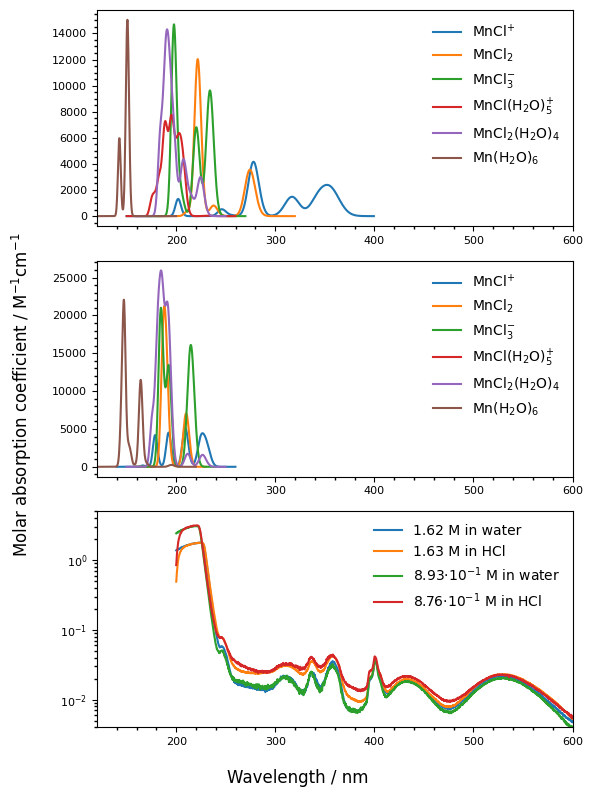

In [43]:
fig, ax = plt.subplots(3, 1, figsize = (6, 8))

plot_cal_uvvis(ax[0], vacuum_uvvis, xkeys, ykeys, labels, colors)
ax[0].set(xlim = (120, 600))

plot_cal_uvvis(ax[1], water_uvvis, xkeys, ykeys, labels, colors)
ax[1].set(xlim = (120, 600))

plot_exp_uvvis(ax[2], experimental, ykes_exp, labels_ForRep)
ax[2].set(yscale = 'log', xlim = (120, 600), ylim = (4*10**(-3), 5))

fig.supxlabel('Wavelength / nm') # , fontsize = 10
fig.supylabel(r'Molar absorption coefficient / M$^{-1}$cm$^{-1}$') # , fontsize = 11

fig.tight_layout()
fig.savefig('cal_exp_uvvis.png', dpi = 150)
plt.show()

### MnCl+

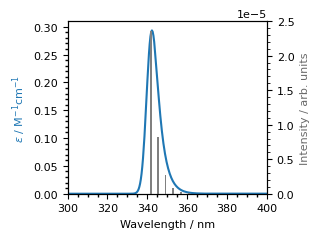

In [44]:
fig, ax = plt.subplots(1, 1, figsize = (3.3, 2.5))

plot_single_spec(ax, dict_nm['MnCl'], dict_Stick_nm['MnCl'], 0.75, (0, 2.5*10**(-5)))

ax.set(xlim = (300, 400), ylim = (0, 0.31))

fig.tight_layout()
fig.savefig('MnCl_nm.png', dpi = 150)
plt.show()

In [45]:
def plot_vib_uvvis(ax, x_spec, y_spec, x_peak, y_peak, stick_width, sci_lim):
    ax = ax
    ax2=ax.twinx()
    # ax.set_title(Title)
    ax.plot(x_spec, y_spec, color = 'tab:blue')
    ax2.bar(x_peak, y_peak, width = stick_width, color = 'grey')
    ax.set_ylabel(r'$\epsilon$ / M$^{-1}$cm$^{-1}$', color = 'tab:blue', fontsize = 8)
    ax2.set_ylabel(r'Intensity / arb. units', color = 'dimgrey', fontsize = 8)
    ax.set_xlabel('Wavelength / nm', fontsize = 8)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax2.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax2.tick_params(axis = 'y', which = 'major', direction = 'out', right = True, labelsize = 8)
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = sci_lim)
    ax.yaxis.offsetText.set_fontsize(8)
    ax2.yaxis.offsetText.set_fontsize(8)

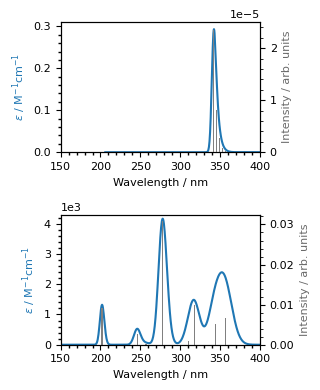

In [46]:
fig, ax = plt.subplots(2, 1, figsize = (3.3, 4))

plot_single_spec(ax[0], dict_nm['MnCl'], dict_Stick_nm['MnCl'], 0.75, (0, 2.5*10**(-5)))
plot_vib_uvvis(ax[1], vacuum_uvvis['X MnCl+'], vacuum_uvvis['Y MnCl+'], vacuum_peak['X MnCl+'], vacuum_peak['Y MnCl+'], 1.5, (3, 3))

ax[0].set(xlim = (150, 400), ylim = (0, 0.31))
ax[1].set(xlim = (150, 400), ylim = (0, 4300))

fig.tight_layout()
fig.savefig('MnCl_vib_uvvis.png', dpi = 150)
plt.show()

### MnCl2

In [47]:
# fig, ax = plt.subplots(1, 1, figsize = (6, 3))

# plot_single_spec(ax, dict_nm['MnCl2'], dict_Stick_nm['MnCl2'])

# ax.set(xlim = (300, 400), ylim = (0, 0.3))

# fig.tight_layout()
# fig.savefig('MnCl2_nm.png', dpi = 150)
# plt.show()

### MnCl3-

In [48]:
# fig, ax = plt.subplots(1, 1, figsize = (6, 3))

# plot_single_spec(ax, dict_nm['MnCl3'], dict_Stick_nm['MnCl3'])

# ax.set(xlim = (300, 400), ylim = (0, 0.3))

# fig.tight_layout()
# fig.savefig('MnCl3_nm.png', dpi = 150)
# plt.show()

### MnClH2O

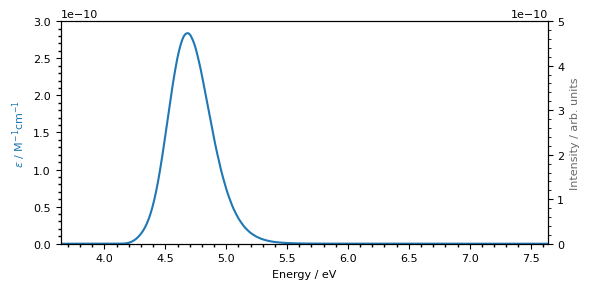

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, dict_eV['MnClH2O'], dict_Stick_eV['MnClH2O'], 0.4, (0, 5*10**(-10)))

ax.set(xlim = (min(dict_eV['MnClH2O'].index), max(dict_eV['MnClH2O'].index)), ylim = (0, 3*10**(-10)))

fig.tight_layout()
fig.savefig('MnClH2O.png', dpi = 150)
plt.show()

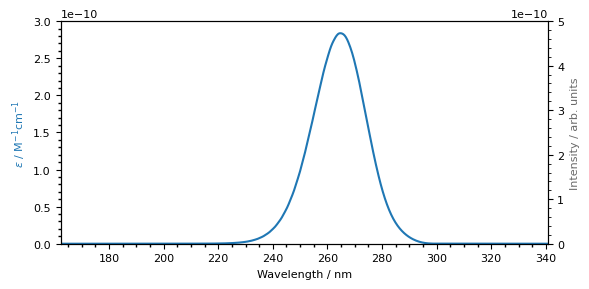

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, dict_nm['MnClH2O'], dict_Stick_nm['MnClH2O'], 0.4, (0, 5*10**(-10)))

ax.set(xlim = (min(dict_nm['MnClH2O']['wavelength']), max(dict_nm['MnClH2O']['wavelength'])), ylim = (0, 3*10**(-10)))

fig.tight_layout()
fig.savefig('MnClH2O_nm.png', dpi = 150)
plt.show()

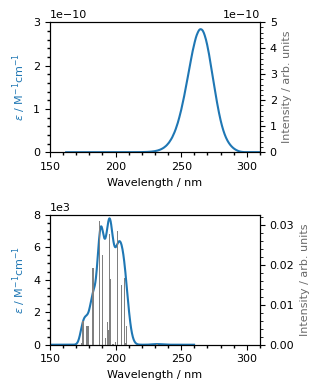

In [51]:
fig, ax = plt.subplots(2, 1, figsize = (3.3, 4))

plot_single_spec(ax[0], dict_nm['MnClH2O'], dict_Stick_nm['MnClH2O'], 0.8, (0, 5*10**(-10)))
plot_vib_uvvis(ax[1], vacuum_uvvis['X MnClH2O'], vacuum_uvvis['Y MnClH2O'], vacuum_peak['X MnClH2O'], vacuum_peak['Y MnClH2O'], 1., (3, 3))

ax[0].set(xlim = (150, 310), ylim = (0, 3*10**(-10)))
ax[1].set(xlim = (150, 310), ylim = (0, 8000))

fig.tight_layout()
fig.savefig('MnClH2O_vib_uvvis.png', dpi = 150)
plt.show()

### MnCl2aq

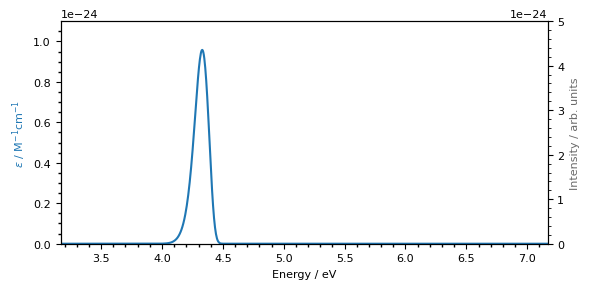

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, dict_eV['MnCl2aq'], dict_Stick_eV['MnCl2aq'], 0.4, (0, 5*10**(-24)))

ax.set(xlim = (min(dict_eV['MnCl2aq'].index), max(dict_eV['MnCl2aq'].index)), ylim = (0, 1.1*10**(-24)))

fig.tight_layout()
fig.savefig('MnCl2aq.png', dpi = 150)
plt.show()

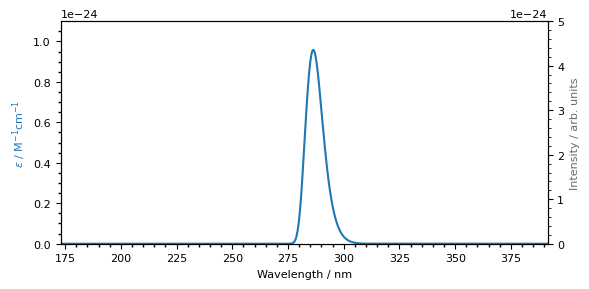

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, dict_nm['MnCl2aq'], dict_Stick_nm['MnCl2aq'], 0.4, (0, 5*10**(-24)))

ax.set(xlim = (min(dict_nm['MnCl2aq']['wavelength']), max(dict_nm['MnCl2aq']['wavelength'])), ylim = (0, 1.1*10**(-24)))

fig.tight_layout()
fig.savefig('MnCl2aq_nm.png', dpi = 150)
plt.show()

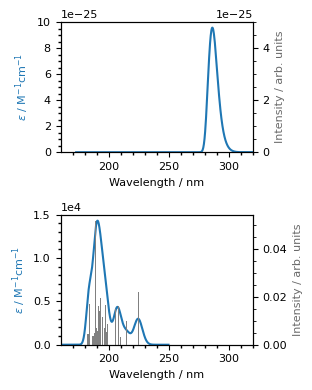

In [54]:
fig, ax = plt.subplots(2, 1, figsize = (3.3, 4))

plot_single_spec(ax[0], dict_nm['MnCl2aq'], dict_Stick_nm['MnCl2aq'], 0.8, (0, 5*10**(-25)))
plot_vib_uvvis(ax[1], vacuum_uvvis['X MnCl2aq'], vacuum_uvvis['Y MnCl2aq'], vacuum_peak['X MnCl2aq'], vacuum_peak['Y MnCl2aq'], 1., (4, 4))

ax[0].set(xlim = (160, 320), ylim = (0, 1*10**(-24)))
ax[1].set(xlim = (160, 320), ylim = (0, 15000))

fig.tight_layout()
fig.savefig('MnCl2aq_vib_uvvis.png', dpi = 150)
plt.show()

### MnCl3aq

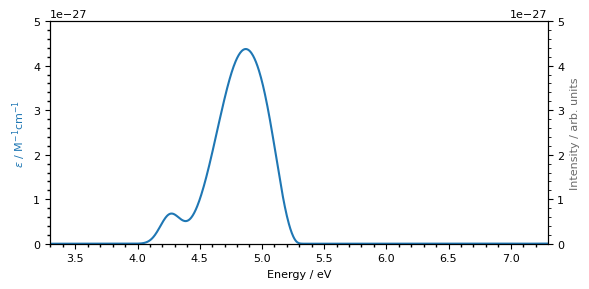

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, dict_eV['MnCl3aq'], dict_Stick_eV['MnCl3aq'], 0.4, (0, 5*10**(-27)))

ax.set(xlim = (min(dict_eV['MnCl3aq'].index), max(dict_eV['MnCl3aq'].index)), ylim = (0, 5*10**(-27)))

fig.tight_layout()
fig.savefig('MnCl3aq.png', dpi = 150)
plt.show()

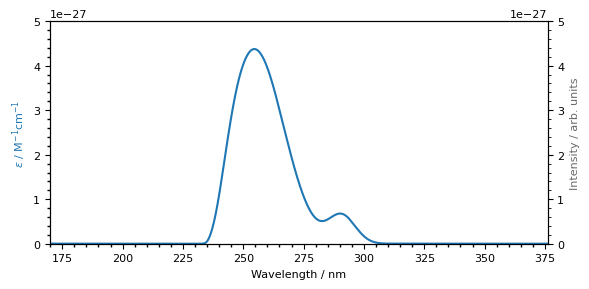

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3))

plot_single_spec(ax, dict_nm['MnCl3aq'], dict_Stick_nm['MnCl3aq'], 0.4, (0, 5*10**(-27)))

ax.set(xlim = (min(dict_nm['MnCl3aq']['wavelength']), max(dict_nm['MnCl3aq']['wavelength'])), ylim = (0, 5*10**(-27)))

fig.tight_layout()
fig.savefig('MnCl2aq_nm.png', dpi = 150)
plt.show()

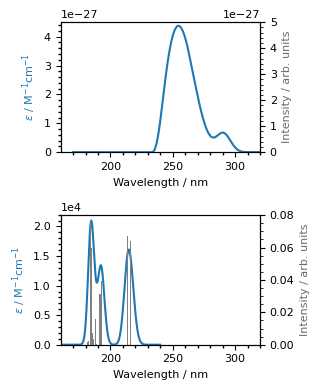

In [57]:
fig, ax = plt.subplots(2, 1, figsize = (3.3, 4))

plot_single_spec(ax[0], dict_nm['MnCl3aq'], dict_Stick_nm['MnCl3aq'], 0.8, (0, 5*10**(-27)))
plot_vib_uvvis(ax[1], water_uvvis['X MnCl3-'], water_uvvis['Y MnCl3-'], water_peak['X MnCl3-'], water_peak['Y MnCl3-'], 1., (4, 4))

ax[0].set(xlim = (160, 320), ylim = (0, 4.5*10**(-27)))
ax[1].set(xlim = (160, 320), ylim = (0, 22000))

fig.tight_layout()
fig.savefig('MnCl3aq_vib_uvvis.png', dpi = 150)
plt.show()

### MnH2O

In [58]:
# fig, ax = plt.subplots(1, 1, figsize = (6, 3))

# plot_single_spec(ax, dict_eV['MnH2O'], dict_Stick_eV['MnH2O'])

# ax.set(xlim = (min(dict_eV['MnH2O'].index), max(dict_eV['MnH2O'].index)), ylim = (0, max(dict_eV['MnH2O']['intensity'])))

# fig.tight_layout()
# fig.savefig('MnH2O.png', dpi = 150)
# plt.show()

In [59]:
# fig, ax = plt.subplots(1, 1, figsize = (6, 3))

# plot_single_spec(ax, dict_nm['MnH2O'], dict_Stick_nm['MnH2O'])

# ax.set(xlim = (min(dict_nm['MnH2O']['wavelength']), max(dict_nm['MnH2O']['wavelength'])), ylim = (0, max(dict_nm['MnH2O']['intensity'])))

# fig.tight_layout()
# fig.savefig('MnH2O_nm.png', dpi = 150)
# plt.show()

### Full spectrum

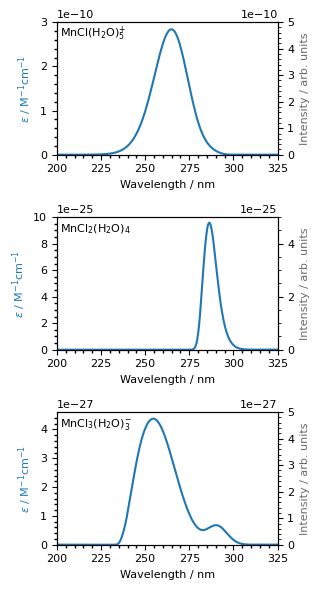

In [60]:
fig , ax = plt.subplots(3, 1, figsize = (3.3, 6))

plot_single_spec(ax[0], dict_nm['MnClH2O'], dict_Stick_nm['MnClH2O'], 0.8, (0, 5*10**(-10)))
ax[0].set(xlim = (200, 325), ylim = (0, 3*10**(-10)))

plot_single_spec(ax[1], dict_nm['MnCl2aq'], dict_Stick_nm['MnCl2aq'], 0.8, (0, 5*10**(-25)))
ax[1].set(xlim = (200, 325), ylim = (0, 1.*10**(-24)))

plot_single_spec(ax[2], dict_nm['MnCl3aq'], dict_Stick_nm['MnCl3aq'], 0.8, (0, 5*10**(-27)))
ax[2].set(xlim = (200, 325), ylim = (0, 4.6*10**(-27)))

# sublabels = ['a', 'b', 'c']
sublabels = ['MnCl(H$_{2}$O)$_{5}^{+}$', 'MnCl$_{2}$(H$_{2}$O)$_{4}$', 'MnCl$_{3}$(H$_{2}$O)$_{3}^{-}$']
for ax, l in zip(ax.flatten(), sublabels):
    ax.text(0.015, 0.89, l, transform = ax.transAxes, fontsize = 8)

fig.tight_layout()
fig.savefig('Claq_full.png', dpi = 500)
plt.show()